# Optional: Symbolic Regression

Discovering equations from data.

## Learning Objectives

1. Understand symbolic regression vs standard ML
2. Use PySR for equation discovery
3. Balance accuracy and complexity
4. Interpret discovered equations

In [ ]:
%pip install -q pycse nbconvert pysr
from pycse.colab import pdf

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Note: PySR must be installed separately
# pip install pysr
try:
    from pysr import PySRRegressor
    PYSR_AVAILABLE = True
except ImportError:
    print("PySR not installed. Run: pip install pysr")
    PYSR_AVAILABLE = False

PySR not installed. Run: pip install pysr


## Symbolic Regression

Unlike black-box ML, symbolic regression finds **interpretable equations**:

- Black-box ML: $y = f(x)$ (unknown function)
- Symbolic regression: $y = 2x^2 + \sin(x)$ (explicit equation)

Uses genetic programming to evolve equations.

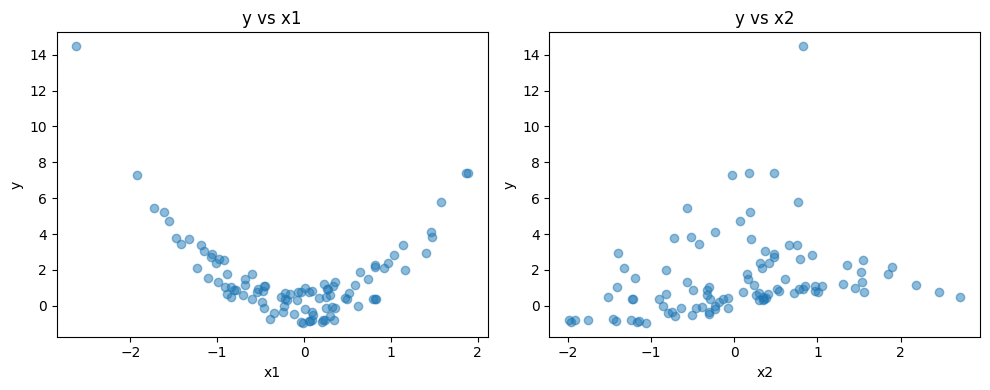

In [2]:
# Create data from a known equation
np.random.seed(42)

# True relationship: y = 2*x1^2 + sin(x2)
X = np.random.randn(100, 2)
y = 2*X[:, 0]**2 + np.sin(X[:, 1]) + np.random.normal(0, 0.1, 100)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], y, alpha=0.5)
plt.xlabel('x1')
plt.ylabel('y')
plt.title('y vs x1')

plt.subplot(1, 2, 2)
plt.scatter(X[:, 1], y, alpha=0.5)
plt.xlabel('x2')
plt.ylabel('y')
plt.title('y vs x2')

plt.tight_layout()
plt.show()

In [3]:
if PYSR_AVAILABLE:
    # Run symbolic regression
    model = PySRRegressor(
        niterations=100,
        binary_operators=["+", "-", "*", "/"],
        unary_operators=["sin", "cos", "exp", "log", "square"],
        maxsize=20,
        verbosity=0
    )
    
    model.fit(X, y)
    
    print("Discovered equations (Pareto front):")
    print(model)

In [4]:
if PYSR_AVAILABLE:
    # Get the best equation
    print(f"\nBest equation: {model.sympy()}")
    print(f"R² Score: {model.score(X, y):.4f}")
    
    # Visualize fit
    y_pred = model.predict(X)
    
    plt.figure(figsize=(8, 8))
    plt.scatter(y, y_pred, alpha=0.5)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Symbolic Regression: {model.sympy()}')
    plt.grid(True, alpha=0.3)
    plt.show()

## Knowledge Check

In [5]:
%pip install -q jupyterquiz
from jupyterquiz import display_quiz

display_quiz("https://raw.githubusercontent.com/jkitchin/s26-06642/main/dsmles/optional/quizzes/symbolic-regression-quiz.json")

/bin/bash: pip: command not found


<IPython.core.display.Javascript object>

## Applications in Chemical Engineering

- **Kinetic models**: Discover rate laws from data
- **Thermodynamic correlations**: Find equations of state
- **Transport properties**: Develop viscosity correlations
- **Process optimization**: Interpretable surrogate models

## Comparison

| Aspect | Neural Networks | Symbolic Regression |
|--------|-----------------|--------------------|
| Accuracy | High | Moderate-High |
| Interpretability | Low | High |
| Extrapolation | Poor | Better |
| Training time | Fast | Slow |
| Physical insight | None | Yes |